# 데이터 준비

In [2]:
import pandas as pd

data_url="C:\\Users\\채재헌\\machine_learning\\dataset\\loan_data.csv"
loan=pd.read_csv(data_url)

In [3]:
loan.head(10)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
5,I need a loan to repair my car after an accident.,108236,404,50797,10.24,employed,Rejected
6,I need financial help to cover maternity and d...,110165,570,61217,7.12,employed,Approved
7,I need money to open a small bookstore and caf챕.,40656,600,21267,113.63,unemployed,Rejected
8,I need a loan to install a security system at ...,38233,346,8467,126.42,unemployed,Rejected
9,I need a loan to cover emergency expenses afte...,81024,403,19217,36.92,unemployed,Rejected


In [4]:
# - one-Hot Encoding으로 수치 유형으로 변환  
# 타겟 열 Employment_Status을 이진 값으로 변환
loan["Employment_Status"]=loan["Employment_Status"].map({"employed":0,"unemployed":1})

# 결과 확인
loan.head(10)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,0,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,0,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,0,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,1,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,0,Approved
5,I need a loan to repair my car after an accident.,108236,404,50797,10.24,0,Rejected
6,I need financial help to cover maternity and d...,110165,570,61217,7.12,0,Approved
7,I need money to open a small bookstore and caf챕.,40656,600,21267,113.63,1,Rejected
8,I need a loan to install a security system at ...,38233,346,8467,126.42,1,Rejected
9,I need a loan to cover emergency expenses afte...,81024,403,19217,36.92,1,Rejected


In [5]:
loan_target=loan["Approval"] 
loan_input=loan[["Income","Credit_Score","Loan_Amount","DTI_Ratio","Employment_Status"]]

In [6]:
loan_target[:5]

0    Rejected
1    Rejected
2    Rejected
3    Rejected
4    Approved
Name: Approval, dtype: object

In [7]:
type(loan_input)

pandas.core.frame.DataFrame

In [8]:
loan_target=loan_target.to_numpy()
loan_input=loan_input.to_numpy()

In [9]:
type(loan_input)

numpy.ndarray

In [10]:
type(loan_target)

numpy.ndarray

# 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_input,test_input,train_target,test_target=train_test_split(loan_input,loan_target,random_state=42)

# 데이터 스케일링

In [13]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [14]:
train_scaled[:5]

array([[ 0.44466921,  0.93752667,  0.33114045, -0.01307517,  1.00144549],
       [ 0.31674229, -1.64311454,  0.84467927, -0.08792399,  1.00144549],
       [-0.54148815,  1.68654205,  0.58012984, -0.44948707,  1.00144549],
       [ 0.45337435,  1.01935188,  1.41887636, -0.72166458, -0.9985566 ],
       [ 0.90542279,  0.02486088,  1.90466021, -0.50515974,  1.00144549]])

# KNeighborsClassifier를 사용하여 모델링

In [15]:
# KNN class 가져오기 
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier 초기화 
knn=KNeighborsClassifier(n_neighbors=30)



#KNN 모델 생성 
knn.fit(train_scaled,train_target)


print(knn.score(train_scaled,train_target))
print(knn.score(test_scaled,test_target))


0.9895
0.9895


In [16]:
import matplotlib.pyplot as plt

train_score=[]
test_score=[]


In [17]:
k_list=[10,20,30,40,50,60,70,100]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_scaled,train_target)
    train_score.append(knn.score(train_scaled,train_target))
    test_score.append(knn.score(test_scaled,test_target))

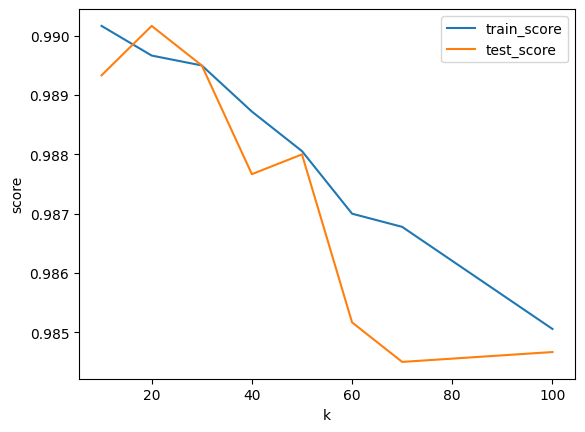

In [18]:
plt.plot(k_list,train_score,label="train_score")
plt.plot(k_list,test_score,label="test_score")
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred=knn.predict(test_scaled)

acc=accuracy_score(test_target,pred)
precision = precision_score(test_target, pred, pos_label="Rejected")
recall = recall_score(test_target, pred, pos_label="Rejected")
f1 = f1_score(test_target, pred, pos_label="Rejected")

print("Accuracy:", acc)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)


Accuracy: 0.9846666666666667
Precision: 0.9920603414053196
Recall: 0.9897029702970297
F1 Score: 0.9908802537668517
